# 6. 신경망을 활용한 데이터 적합
## 6.1 인공 뉴런
- 인공 신경망(줄여서 신경망)의 기본 빌딩 블럭은 뉴런(neuron)
- 뉴런은 입력에 대한 선형 변환과(입력에 가중치를 곱하고 편향값을 더하는 것) 활성 함수(activation fuction)라 부르는 고정된 비선형 함수를 적용하는 역할을 함
- o = f(w * x + b) : f는 활성 함수인데 여기서는 쌍곡탄젠트(hyperbolic tangent)로 설정, x나 o는 단순 스칼라값 혹은 벡터, w는 단일 스칼라 혹은 행렬, b는 스칼라나 벡터 (벡터일 경우에는 입력 및 가중치와 차원이 일치해야 함)
- 벡터의 경우에는 여러 차원으로 가중치와 편향값을 가진 여러 개의 뉴런을 나타내므로, 이런 표현식은 뉴런 계층(layer)이라 함

### 6.1.1 다중 계층 신경망 합성하기  

<img src="https://user-images.githubusercontent.com/107118671/189272522-22566d7e-3183-4ff3-a795-048f3b9978aa.png" width = "70%" height="70%" align="left">

### 6.1.2 오차 함수
- 선형 모델과 딥러닝과의 주요한 차이점 중 하나는 오차 함수의 모양
- 신경망의 오차 함수가 볼록 형태가 아닌 것은 활성 함수 때문

### 6.1.3 우리에게 필요한 건 활성 함수
- 활성 함수의 역할 1 : 모델 내부에서 출력 함수가 값마다 다른 기울기를 가지도록 만들어줌
- 활성 함수의 역할 2 : 선형 연산의 출력을 특정 범위로 제한해줌 (하이퍼볼릭 탄젠트, 시그모이드 ...)

In [7]:
import math
math.tanh(-2.2) # 쓰레기차

-0.9757431300314515

In [8]:
math.tanh(0.1) # 곰

0.09966799462495582

In [9]:
math.tanh(2.5) # 똘똘한 댕댕이

0.9866142981514303

### 6.1.4 그 밖의 활성 함수

<img src="https://user-images.githubusercontent.com/107118671/189273667-e7f6d73c-890d-421e-8cf3-4aa91d838a4f.png" width = "70%" height="70%" align="left">

- 매끄러운 함수 : Tanh, Softplus
- 각진 버전의 함수 : Hardtanh, ReLU (ReLU는 통상 활성 함수들 중에 성능 좋음)
- 시그모이드(Sigmoid) 활성 함수는 로지스틱(logistic) 함수라고도 함

### 6.1.5 최적의 활성 함수 고르기
- 활성 함수의 특징은 다음과 같음
##### 비선형임. 비선형성이 전체 신경망이 더 복잡한 함수로 근사하도록 해줌
##### 미분 가능함. 덕분에 기울기 계산이 가능해짐  

- 활성 함수에 대해 다음은 맞는 말
##### 최소한 하나의 민감한 구간 가짐, 이 부분이 훈련에서 필요한 구간임
##### 대부분이 둔감함 구간을 가지며, 이 구간에서는 입력의 변화가 출력에 거의 영향을 주지 않거나 아얘 변화가 없음

### 6.1.6 신경망에서 학습의 의미
- 학습 : 예제를 통해 일반 모델을 최적화하는 과정
- 명시적인 모델을 대신 훈련되지 않은 일반 모델에서 출발하며 우리는 여러 입출력쌍 예제와 역전파할 손실 함수를 제공하여 일반 모델을 특정 작업에 최적화

## 6.2 파이토치 nn모듈
- torch.nn 에는 모든 신경망 아키텍쳐를 만들 수 있는 빌딩 블럭이 들어있는데 이런 빌딩 블럭을 모듈(module)이라 부름

- nn.Module에는 nn.Linear라는 서브클래스가 있고 이는 파라미터 속성인 weight와 bias를 통해서 입력에 대한 아핀(Affine) 변환을 적용해줌

### 6.2.1 forward 대신 __call__ 사용하기
- 파이토치가 제공하는 nn.Module의 모든 서브클래스에는 __call__ 메소드가 정의되어 있음. 이를 통해 nn.Linear를 인스턴스화하여 마치 함수인 것처럼 실행할 수 있음

In [151]:
%matplotlib inline
import numpy as np
import torch
import torch.optim as optim

torch.set_printoptions(edgeitems=2, linewidth=75)

In [152]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) # <1>
t_u = torch.tensor(t_u).unsqueeze(1) # <1>

t_u.shape

torch.Size([11, 1])

In [153]:
# 데이터셋 나누기
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)
# randperm 함수는 색인 순열을 찾기 위해 텐서 요소를 섞었을 때의 인덱스 리스트 반환

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([4, 0, 9, 8, 5, 7, 1, 3, 6]), tensor([ 2, 10]))

In [154]:
# 인덱스 텐서를 얻었으니 데이터 텐서로부터 훈련셋과 검증셋 만들기
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

t_un_val

tensor([[5.8200],
        [6.8400]])

In [74]:
import torch.nn as nn

linear_model = nn.Linear(1, 1)
linear_model(t_un_val)

tensor([[7.0384],
        [5.2097]], grad_fn=<AddmmBackward0>)

- 여기에서 인자를 가지고 nn.Module 인스턴스를 호출하면 동일한 인자로 foward를 호출  

##### foward 메소드는 순방향 연산을 수행하는 반면 __call__ 은 foward를 호출하기 전후에 몇 가지 중요한 작업을 수행   

##### 그래서 forward를 직접 호출할 수 있고 __call__과 같은 결과를 얻겠지만 유저 코드에서는 사용하지 않는 편이 좋음
##### y = model(x) < 맞음
##### y = model.foward(x) < 티도 안 나는 오류지만 사용 지양

### 6.2.2 다시 선형 모델로
- nn.Linear 생성자는 세 개의 인자를 받음
- 입력 피처의 수와 출력 피처의 수 그리고 선형 모델이 편향값을 포함하는지 여부 (기본값은 True)

In [75]:
import torch.nn as nn

linear_model = nn.Linear(1, 1)  # 인자는 입력 size와 출력 size이며 편향값은 기본인 True
linear_model(t_un_val)

tensor([[4.3511],
        [2.9883]], grad_fn=<AddmmBackward0>)

#### 이제 하나의 입력 피처와 하나의 출력 피처를 가진 nn.Linear 인스턴스가 있음
#### 이 인스턴스는 하나의 가중치와 편향값을 요구

In [76]:
linear_model.weight

Parameter containing:
tensor([[0.6989]], requires_grad=True)

In [77]:
linear_model.bias

Parameter containing:
tensor([-0.4291], requires_grad=True)

##### 2.18 * (가중치) + (편향값) == 출력값
##### 6.84 * (가중치) + (편향값) == 출력값

#### 이제 입력값으로 모듈 호출 가능

In [78]:
x = torch.ones(1)
linear_model(x)

tensor([0.2698], grad_fn=<AddBackward0>)

In [79]:
# 여러 샘플들을 수용하기 위해 모듈 입력의 0번째 차원은 배치(batch)에 들어있는 샘플의 수라고 생각
x = torch.ones(10,1)
linear_model(x)

tensor([[0.2698],
        [0.2698],
        [0.2698],
        [0.2698],
        [0.2698],
        [0.2698],
        [0.2698],
        [0.2698],
        [0.2698],
        [0.2698]], grad_fn=<AddmmBackward0>)

In [80]:
linear_model = nn.Linear(1,1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

In [81]:
linear_model.parameters()

<generator object Module.parameters at 0x0000020097AC6E40>

In [82]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[0.1648]], requires_grad=True),
 Parameter containing:
 tensor([0.6421], requires_grad=True)]

In [85]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val, t_c_train, t_c_val):
    for epoch in range(1,n_epochs + 1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)
        
        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        
        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f}," f"Validation loss {loss_val.item():.4f}")

- 모델이 내부적으로 Parameters를 들고 있으니 명시적으로 model에 params를 전달하지 않게 됨
- nn 자체에 이미 일반적인 손실함수가 들어 있음 MSE는 nn.MSELoss인데 앞에서 정의한 loss_fn과 동일

In [89]:
linear_model = nn.Linear(1,1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(n_epochs = 3000, optimizer = optimizer, model = linear_model, loss_fn = nn.MSELoss(), 
              t_u_train=t_un_train, t_u_val = t_un_val, t_c_train = t_c_train, t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 129.0079,Validation loss 189.0633
Epoch 1000, Training loss 3.7170,Validation loss 3.6198
Epoch 2000, Training loss 3.1652,Validation loss 2.3433
Epoch 3000, Training loss 3.1539,Validation loss 2.1826

Parameter containing:
tensor([[5.2399]], requires_grad=True)
Parameter containing:
tensor([-16.7290], requires_grad=True)


## 6.3 드디어 신경망
### 6.3.1 선형 모델 대체하기
- 첫 번째 선형 + 활성층은 은닉층(hidden layer)라고 불러옴
<img src="https://user-images.githubusercontent.com/107118671/189301560-13813a72-8ced-4d74-9a8c-6d1de35dbd87.png" width = "70%" height="70%" align="left">



In [150]:
seq_model = nn.Sequential(nn.Linear(1,13),nn.Tanh(),nn.Linear(13,1))

seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

### 6.3.2 파라미터 살펴보기

In [91]:
# 파라미터의 차원 정보 살펴보기
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

##### [첫 번째 선형모듈 weight, 첫 번째 선형모듈 bias, 두 번째 선형모듈 weight, 두 번째 선형모듈 bias]

In [92]:
# 파라미터를 이름으로 식별가능하게
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [98]:
# Sequential은 OrderDict라는 인자도 받는데, 여기에 각 모듈의 이름을 정해서 전달해도 됨
# OrderDict를 사용해 계층의 순서를 보장해주고 계층의 순서가 중요함을 강조
from collections import OrderedDict
seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1,8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8,1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [149]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)
    
# 출력 결과 이해하기 더 쉬워짐

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [100]:
seq_model.output_linear.bias

Parameter containing:
tensor([0.1048], requires_grad=True)

In [104]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3) # 안정성을 위해 학습률 조금 떨어뜨림

training_loop(n_epochs = 5000, optimizer = optimizer, model = seq_model, loss_fn = nn.MSELoss(), 
              t_u_train = t_un_train, t_u_val = t_un_val, t_c_train = t_c_train, t_c_val = t_c_val)

print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad) # 은닉층의 선형 영역에서 weight의 기울기 출력

Epoch 1, Training loss 174.5213,Validation loss 254.9427
Epoch 1000, Training loss 6.0877,Validation loss 3.0387
Epoch 2000, Training loss 4.0650,Validation loss 0.5107
Epoch 3000, Training loss 2.5841,Validation loss 0.0658
Epoch 4000, Training loss 2.2673,Validation loss 0.0553
Epoch 5000, Training loss 2.2033,Validation loss 0.0696
output tensor([[20.5180],
        [ 7.3163]], grad_fn=<AddmmBackward0>)
answer tensor([[21.],
        [ 8.]])
hidden tensor([[-0.0303],
        [-6.9643],
        [-0.3536],
        [-6.6190],
        [ 6.6058],
        [ 0.0409],
        [-4.3778],
        [-0.4034]])


### 6.6.3 선형 모델과 비교하기

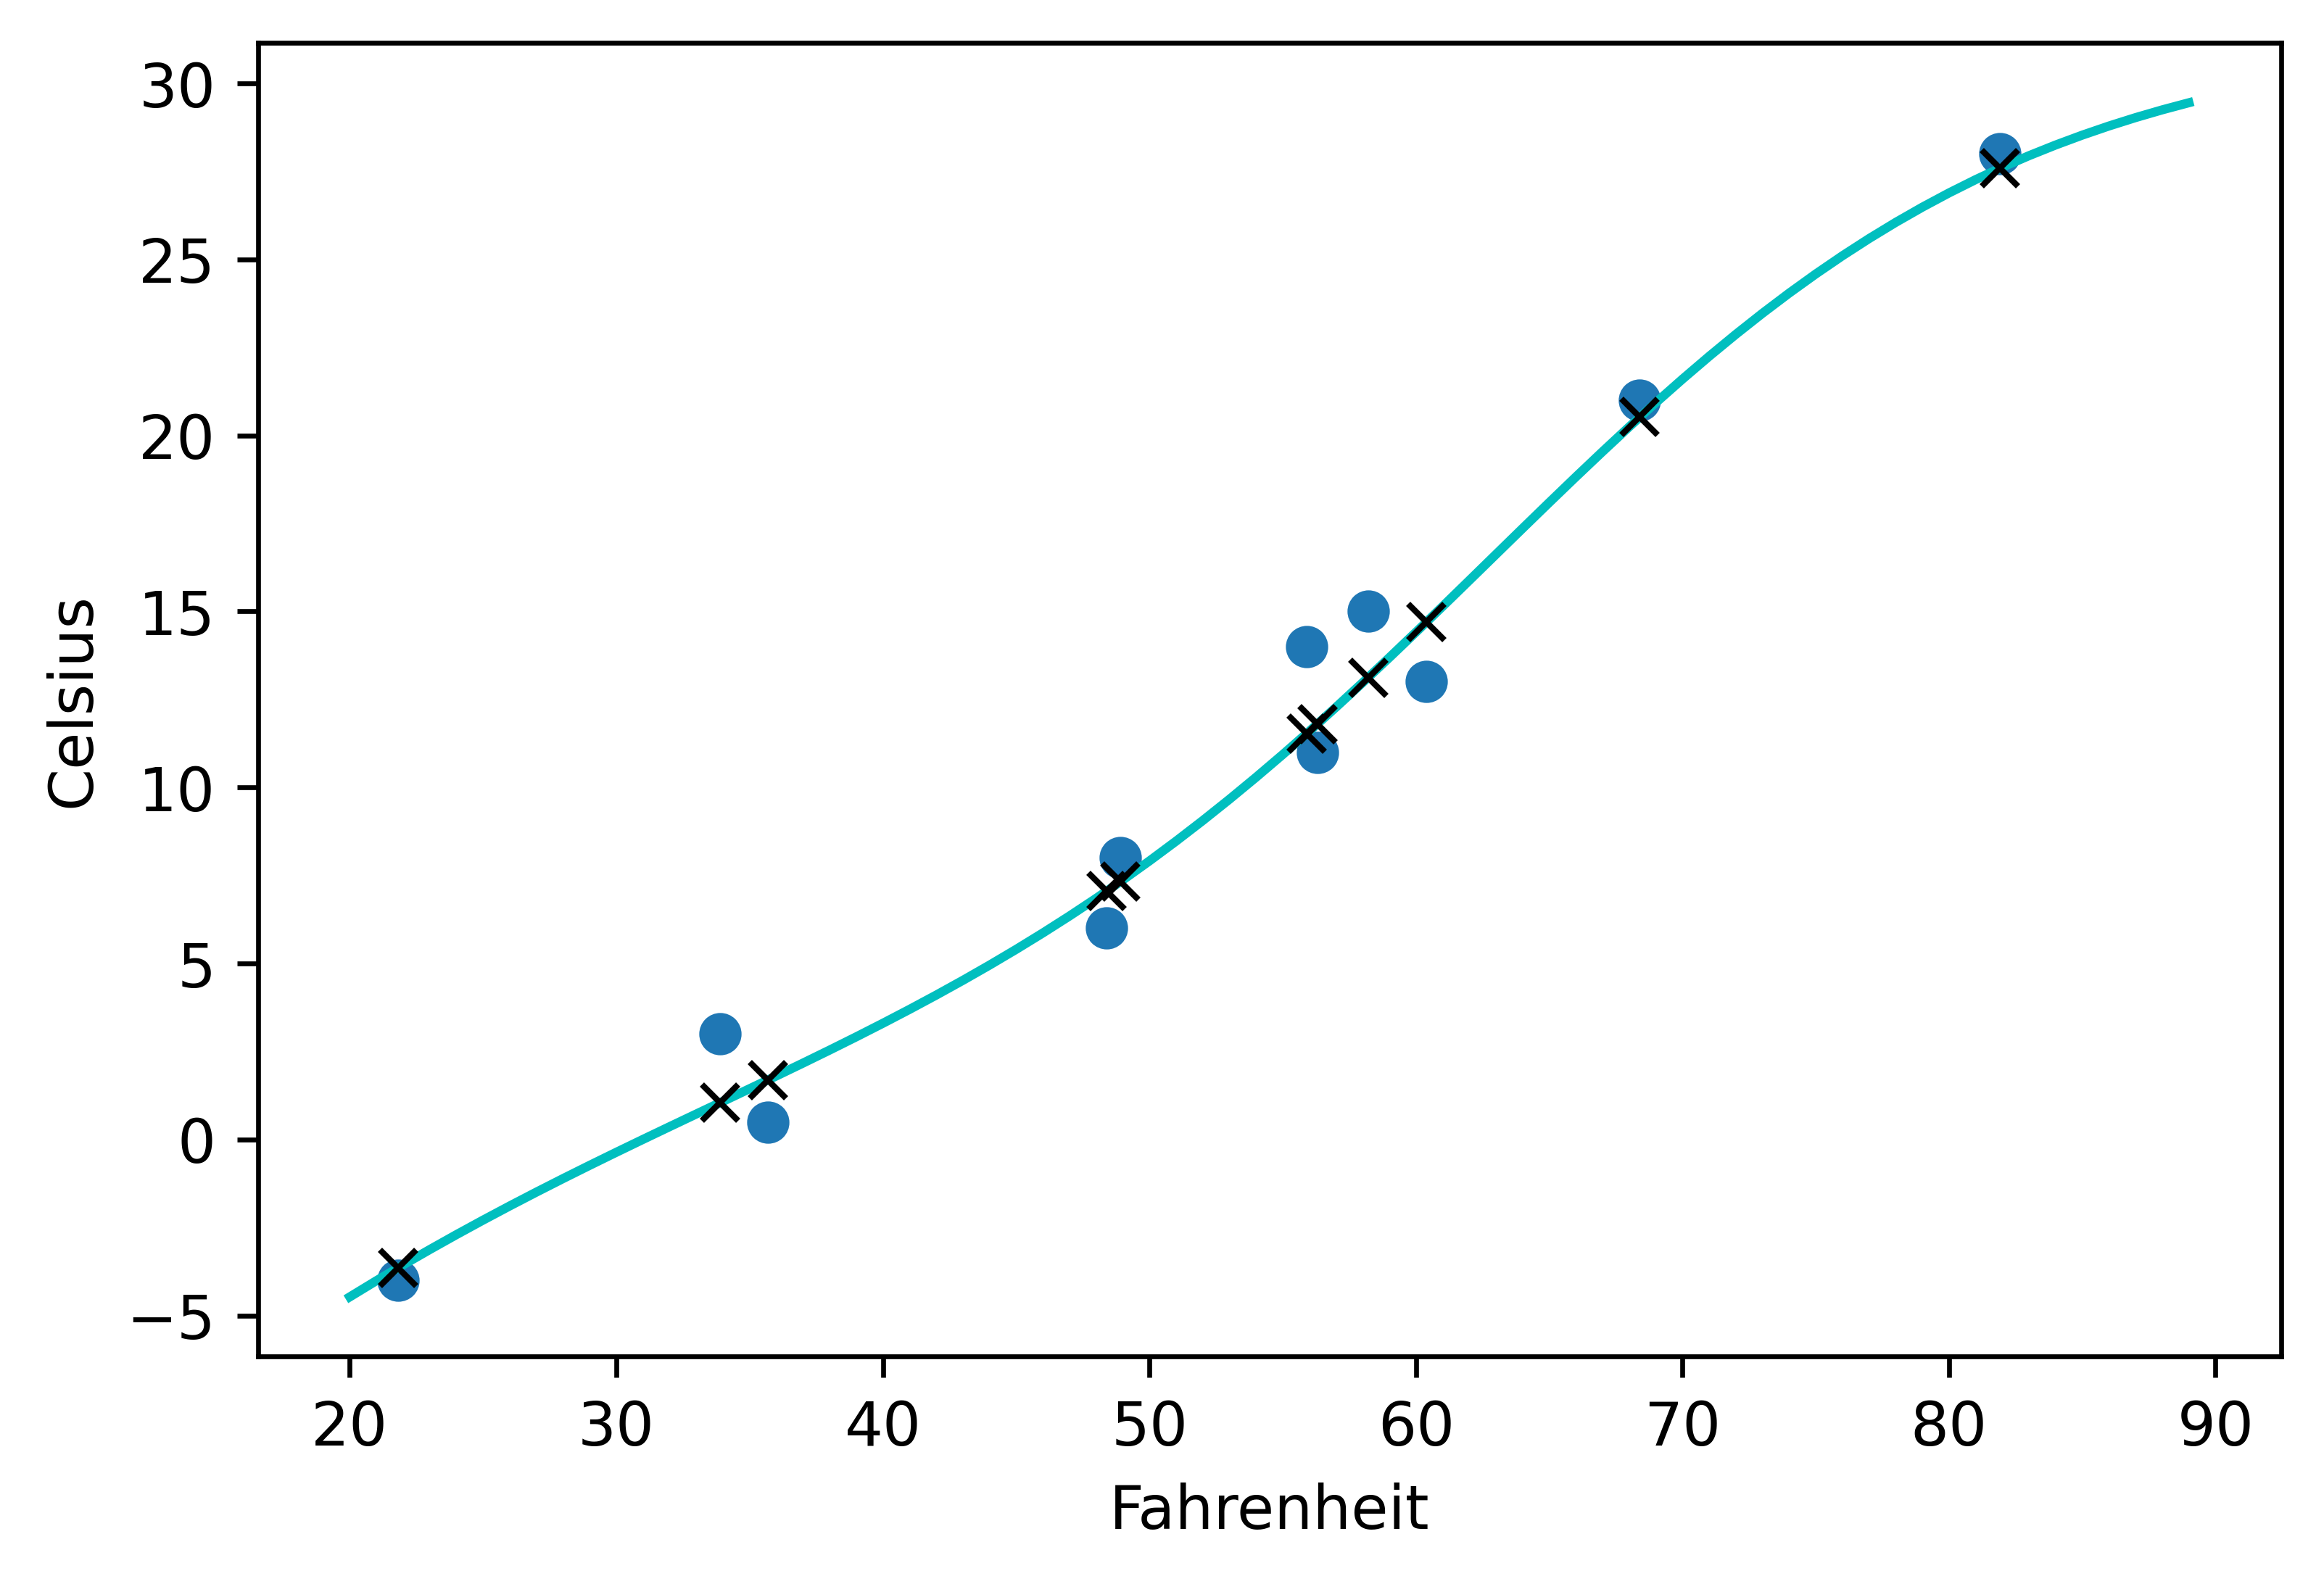

In [106]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')

- 입력 데이터는 o로, 출력 데이터는 x로 표시한 신경망 모델 그래프
- 연속된 선이 샘플 사이에서 모델의 행동을 보여줌

## 6.5 연습 문제

In [110]:
# 1
from collections import OrderedDict
seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear_1', nn.Linear(1,8)),
    ('hidden_activation_1', nn.Tanh()),
    ('hidden_linear_2', nn.Linear(8,1)),
    ('hidden_activation_2', nn.Tanh()),
    ('hidden_linear_3', nn.Linear(1,8)),
    ('hidden_activation_3', nn.Tanh()),
    ('output_linear', nn.Linear(8,1))
]))

seq_model

Sequential(
  (hidden_linear_1): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation_1): Tanh()
  (hidden_linear_2): Linear(in_features=8, out_features=1, bias=True)
  (hidden_activation_2): Tanh()
  (hidden_linear_3): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation_3): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [112]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

training_loop(n_epochs = 5000, optimizer = optimizer, model = seq_model, loss_fn = nn.MSELoss(), 
              t_u_train = t_un_train, t_u_val = t_un_val, t_c_train = t_c_train, t_c_val = t_c_val)

print('output', seq_model(t_un_val))
print('answer', t_c_val)

Epoch 1, Training loss 3.2054,Validation loss 0.2404
Epoch 1000, Training loss 4.0242,Validation loss 6.8303
Epoch 2000, Training loss 3.0608,Validation loss 4.6987
Epoch 3000, Training loss 2.5332,Validation loss 4.0877
Epoch 4000, Training loss 2.2162,Validation loss 4.4767
Epoch 5000, Training loss 2.0076,Validation loss 5.3176
output tensor([[20.2810],
        [ 8.3212]], grad_fn=<AddmmBackward0>)
answer tensor([[21.],
        [ 8.]])


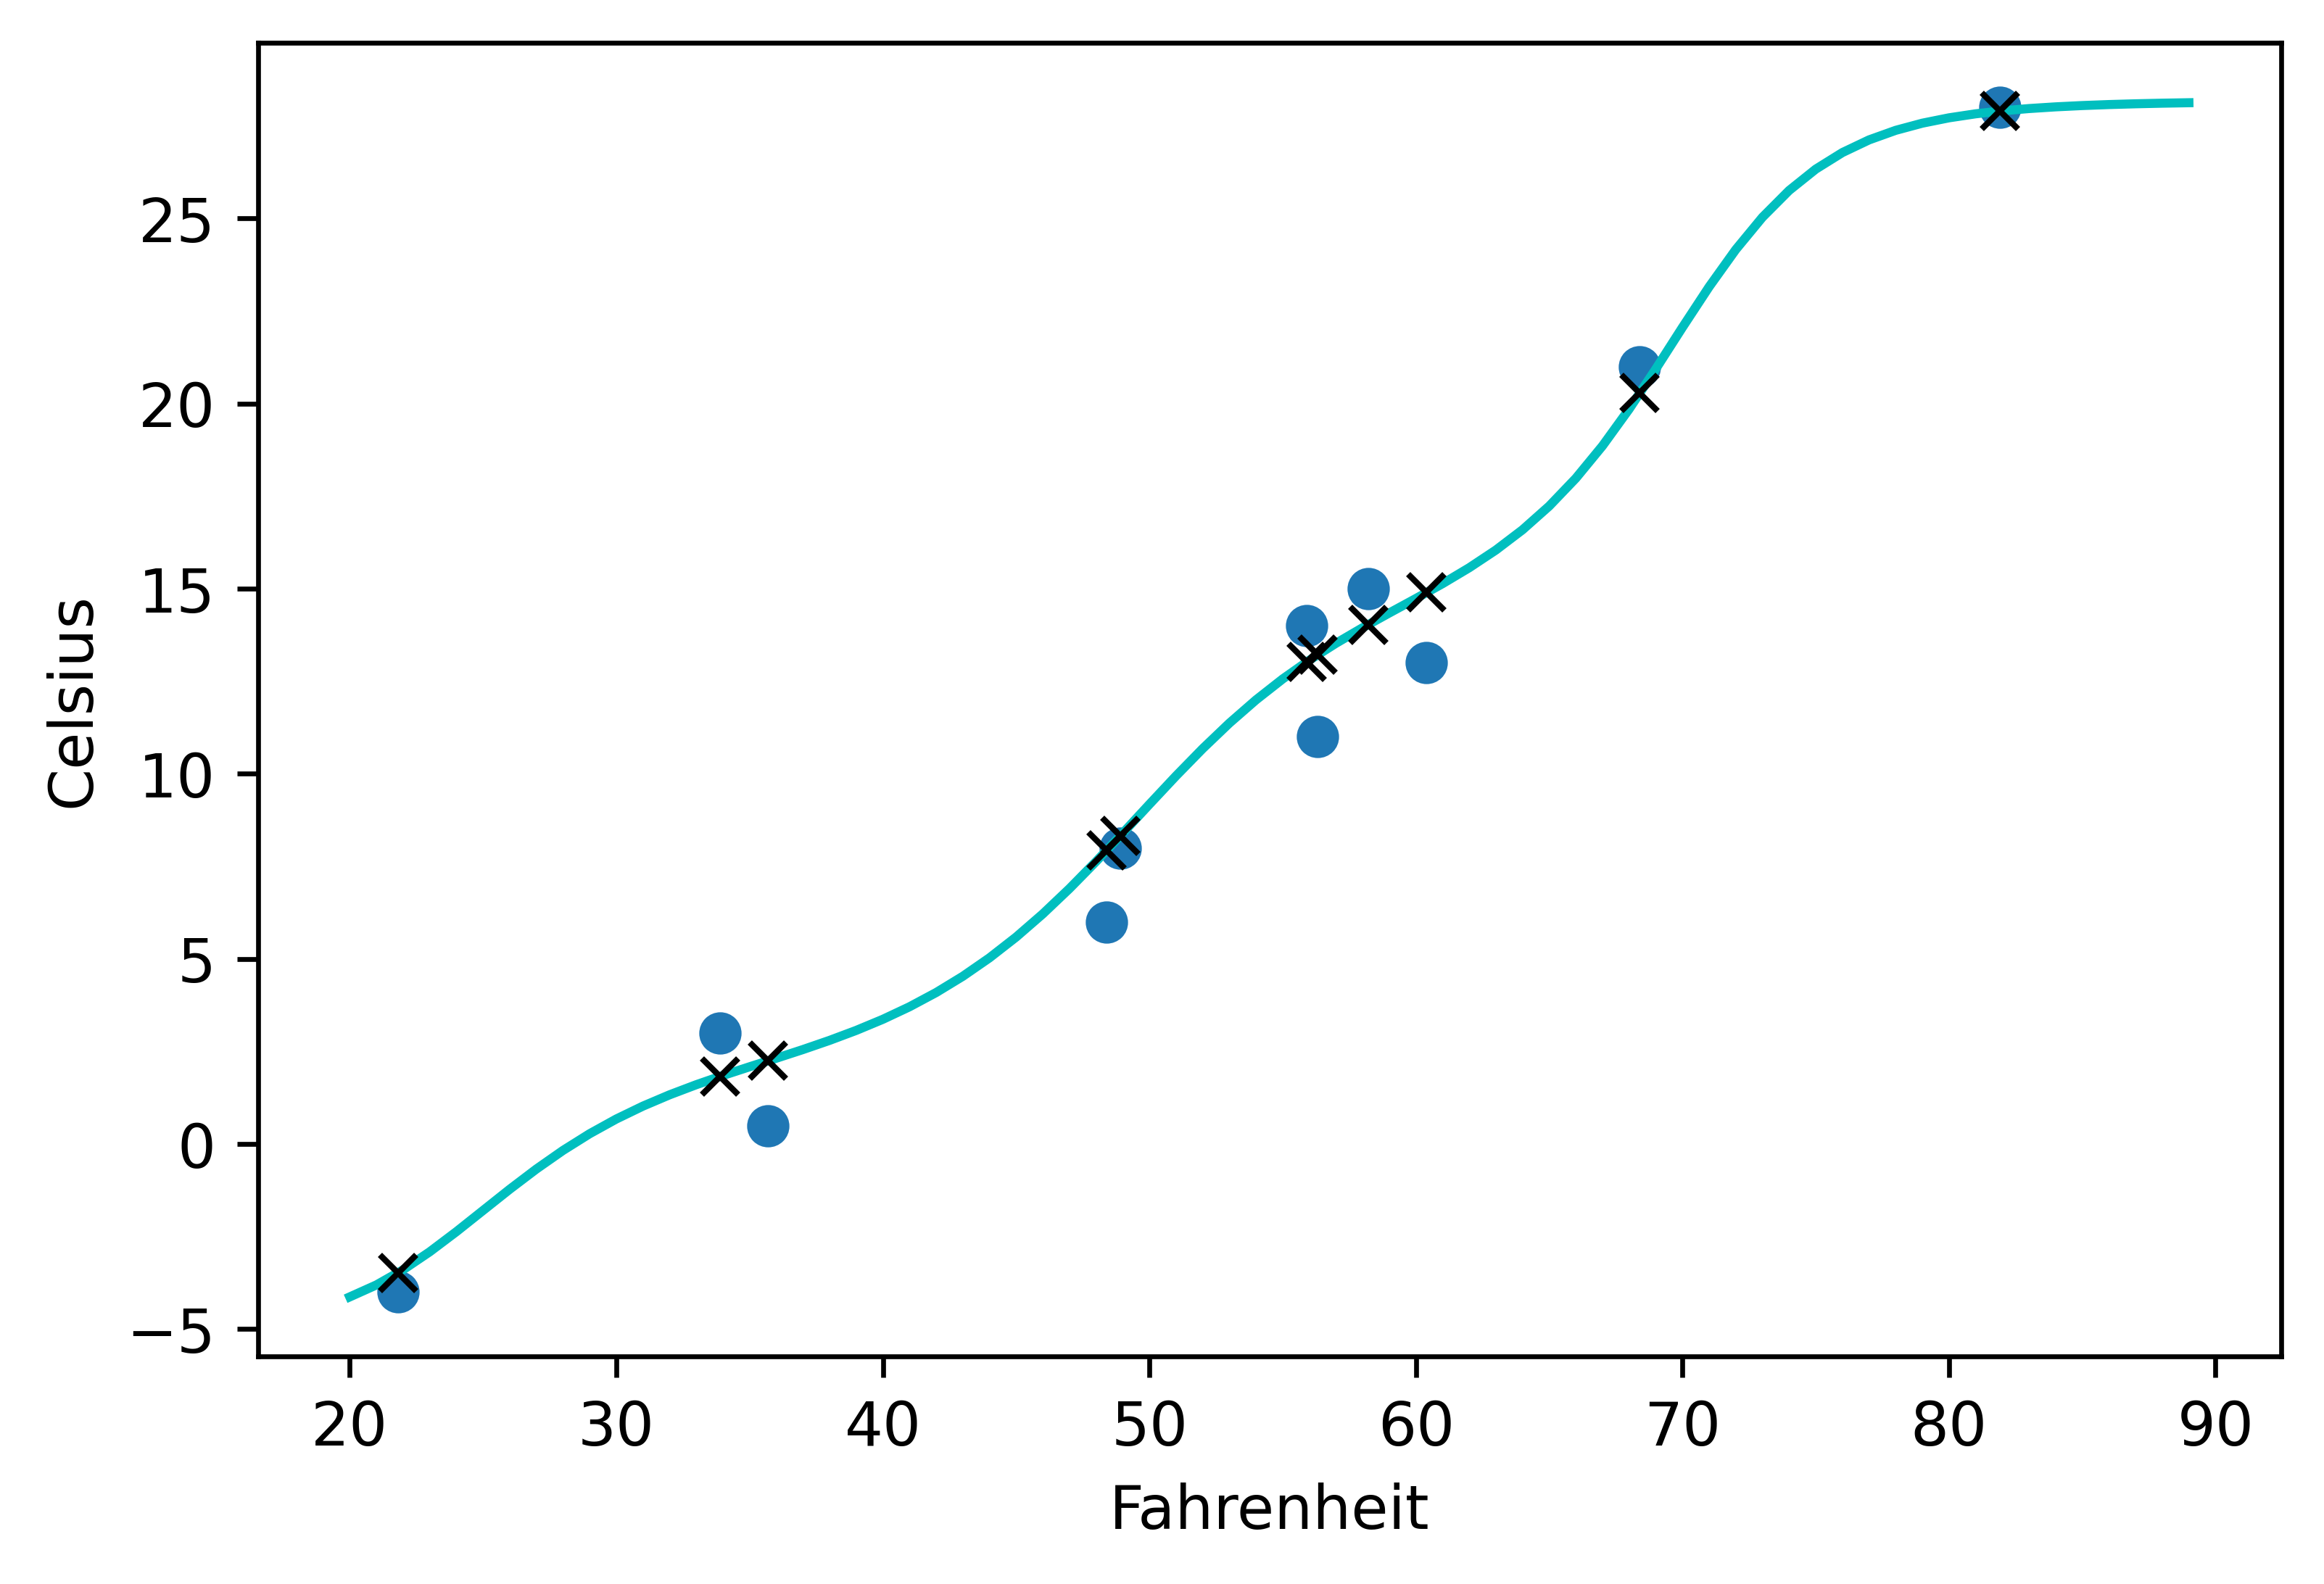

In [113]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')

In [143]:
from collections import OrderedDict
seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1,8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8,1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [144]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-2)

training_loop(n_epochs = 5000, optimizer = optimizer, model = seq_model, loss_fn = nn.MSELoss(), 
              t_u_train = t_un_train, t_u_val = t_un_val, t_c_train = t_c_train, t_c_val = t_c_val)

print('output', seq_model(t_un_val))
print('answer', t_c_val)

Epoch 1, Training loss 203.6537,Validation loss 297.6686
Epoch 1000, Training loss 29.6650,Validation loss 35.3055
Epoch 2000, Training loss 32.2700,Validation loss 32.6085
Epoch 3000, Training loss 31.9362,Validation loss 42.1643
Epoch 4000, Training loss 31.7081,Validation loss 42.0351
Epoch 5000, Training loss 33.5241,Validation loss 46.0799
output tensor([[16.5335],
        [16.3111]], grad_fn=<AddmmBackward0>)
answer tensor([[21.],
        [ 8.]])


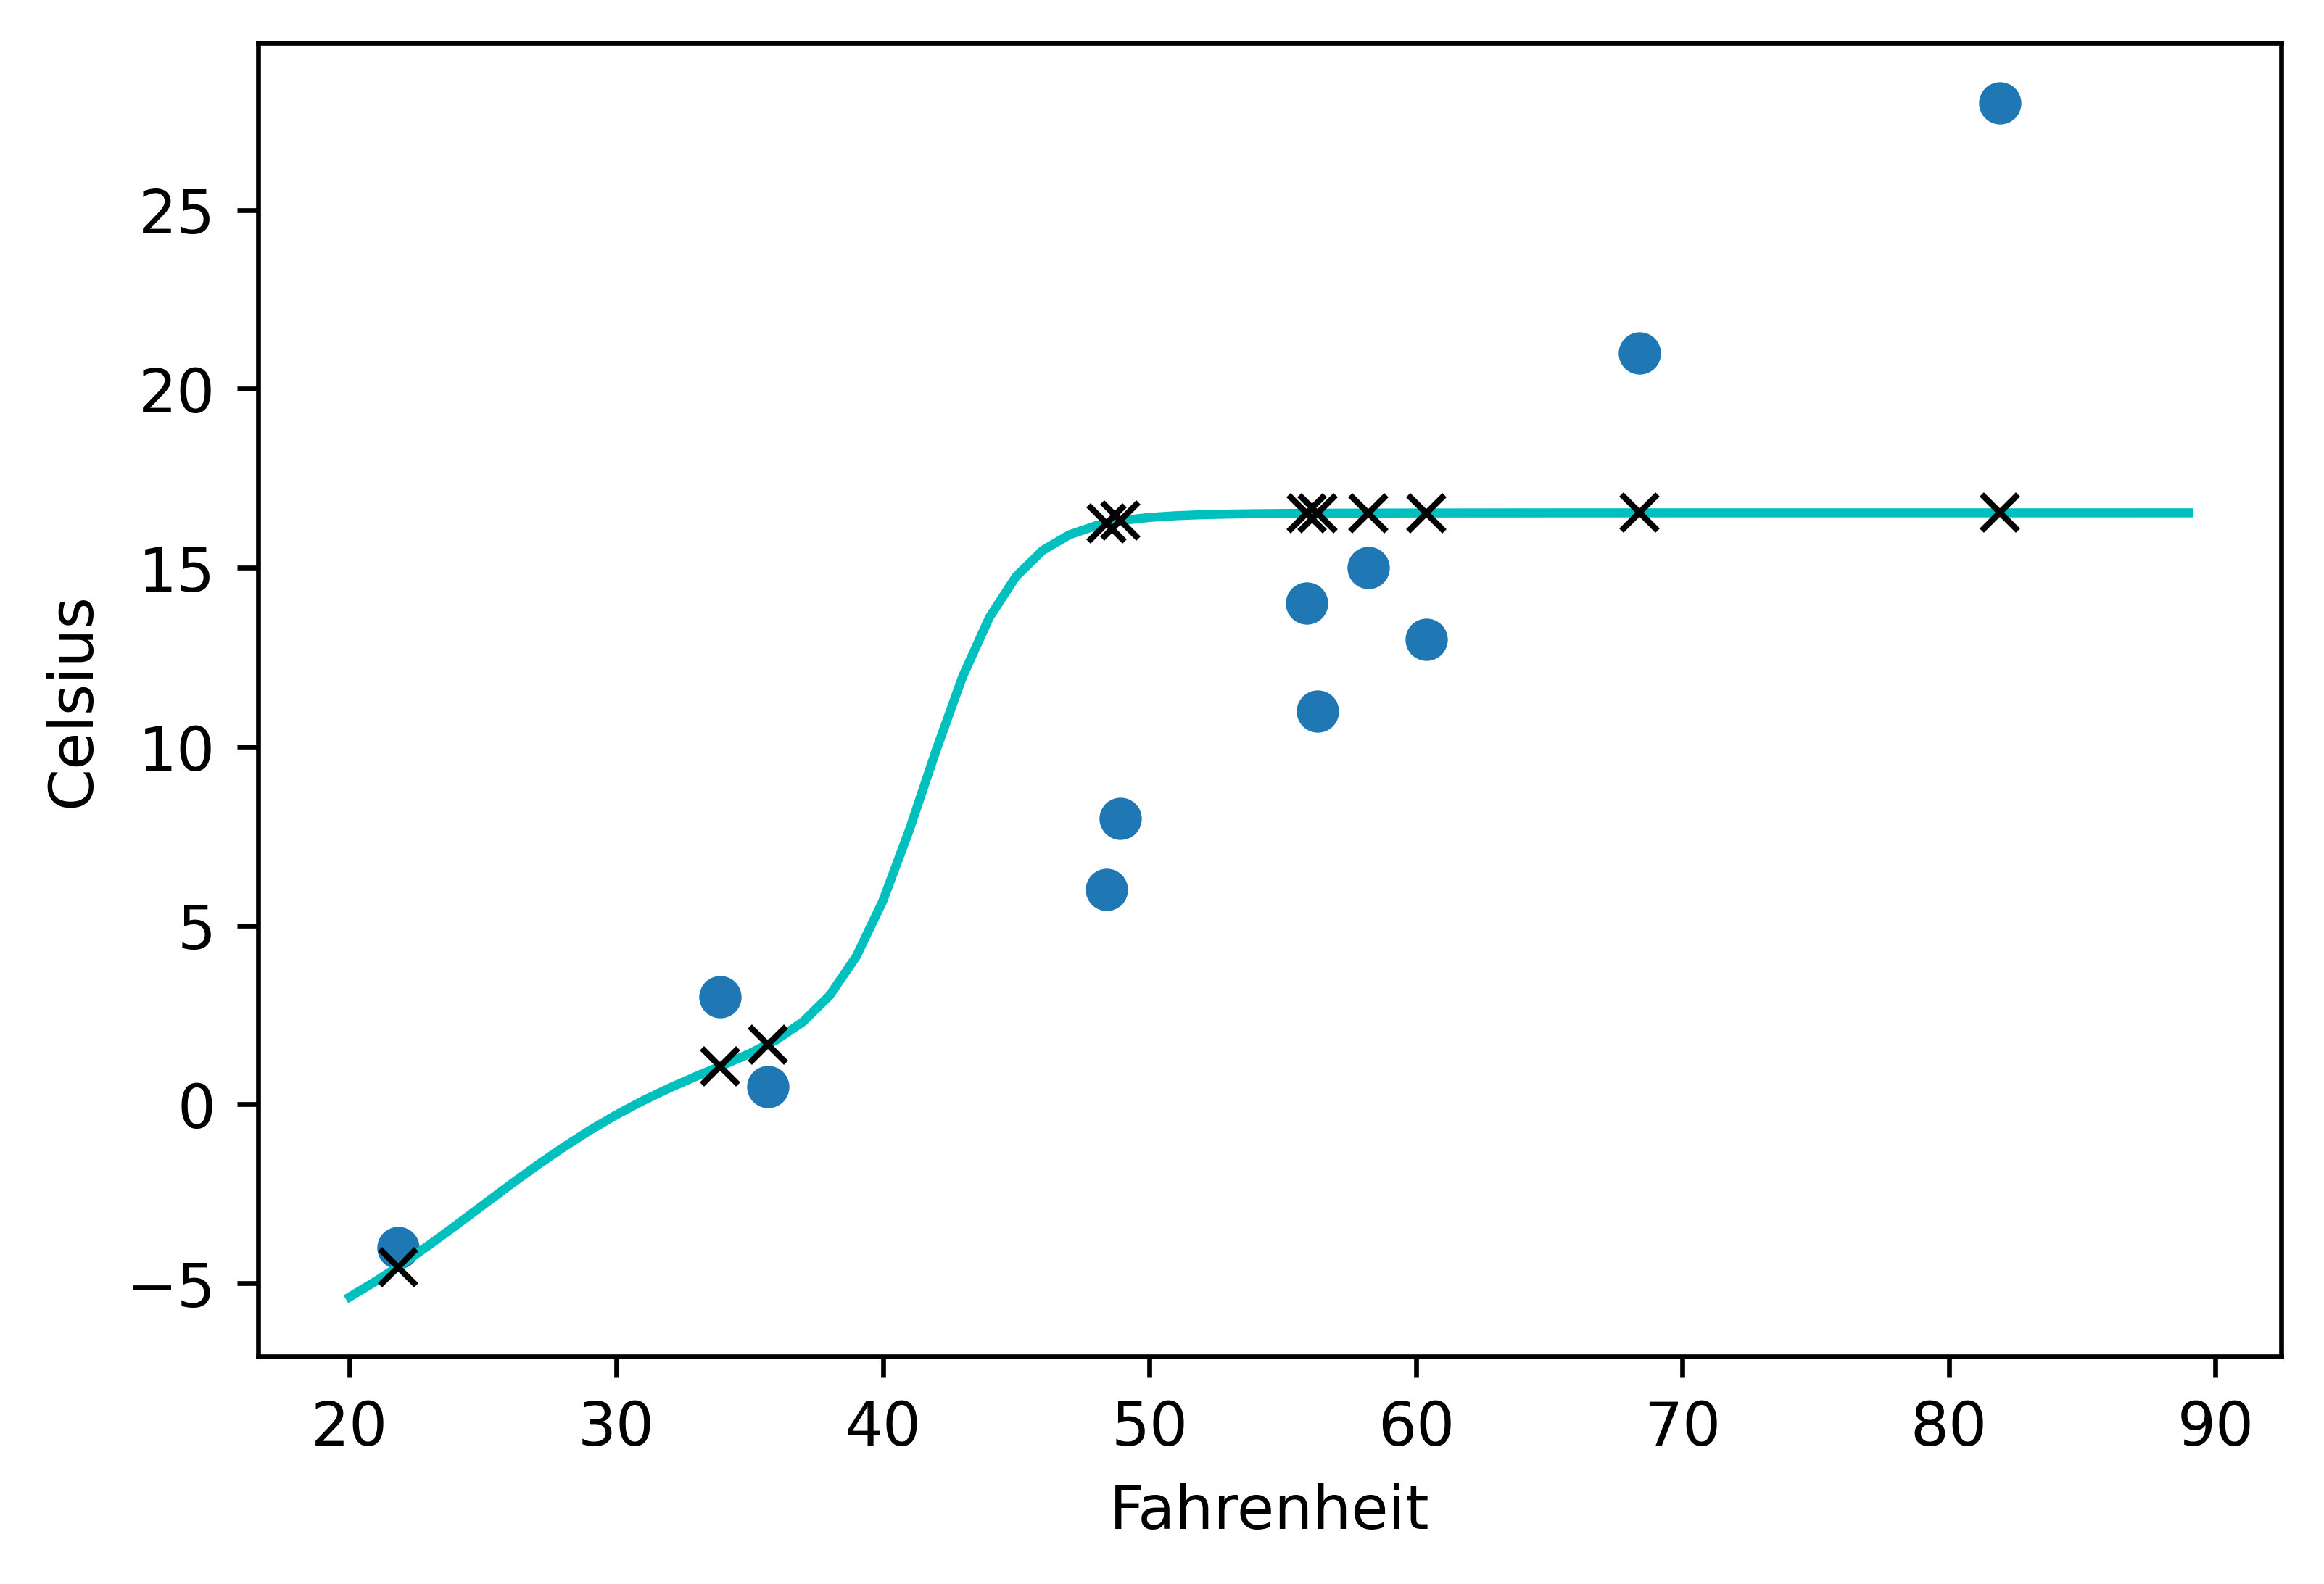

In [145]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')

- 은닉층을 여러층으로 하니 더욱 과적합한 모델이 됨
- 학습률을 변화시키니 더욱 선형인 모델이 됨

In [155]:
# 2
import csv
wine_path = "../data/p1ch4/tabular-wine/winequality-white.csv"
wineq_numpy = np.loadtxt(wine_path, dtype=np.float32, delimiter=";", 
                        skiprows=1) 
wineq_numpy

array([[ 7.  ,  0.27,  0.36, ...,  0.45,  8.8 ,  6.  ],
       [ 6.3 ,  0.3 ,  0.34, ...,  0.49,  9.5 ,  6.  ],
       [ 8.1 ,  0.28,  0.4 , ...,  0.44, 10.1 ,  6.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]], dtype=float32)